### Forecasting Procedure:

In [1]:
## General Python Tip:
## To print multiple results within same cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## Steps:
# 1. Choose your model based on your data i.e. perform different statistical test to determine best model for your data.
# 2. Split the data into train and test sets.
# 3. Fit model on training set
# 4. Evaluate model on test set
# 5. Re-fit the model on entire dataset
# 6. Forecast for future

In [3]:
## Overall Agenda:
# - Intro to forecasting
# - ACF and PACF plots
# - AR
# - Descriptive Statistics and Tests
# - Choosing ARIMA orders
# - ARIMA based models

In [4]:
# Till now, we have already seen how Holt Winters method can model an existing time series.
# Lets see how we can use Holt-Winters model that we have created to forecast the value on future dates!
# Alongwith forecasting, we will also check how we can evaluate Forecasting Predictions

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Airlines.csv", index_col=0, parse_dates=True)

In [7]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
# To run statsmodels, we need to set index freq:
df.index.freq = "MS"

In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [10]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [11]:
# Splitting of train and test set
# Ideally, the test set should be atleast as large as the maximum forecast horizon required!
# Eg: If i want to forecast 6 months data, then i should consider atleast 6 months for test set as well

In [12]:
df.shape

(144, 1)

In [13]:
# Train-test split via index location.
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [14]:
train_data.head()
train_data.tail()
train_data.shape

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


,Passengers
Month,
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340


(109, 1)

In [15]:
test_data.head()
test_data.tail()
test_data.shape

,Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363


,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


(36, 1)

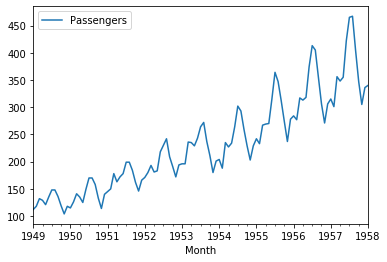

In [16]:
train_data.plot()

In [244]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [230]:
fitted_model = ExponentialSmoothing(train_data['Passengers'], 
                                    trend='add', 
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [231]:
test_prediction = fitted_model.forecast(36)

In [232]:
test_prediction

1958-02-01    333.203204
1958-03-01    386.424346
1958-04-01    376.003873
1958-05-01    377.507193
1958-06-01    433.360886
1958-07-01    480.506929
1958-08-01    475.332211
1958-09-01    417.654972
1958-10-01    363.177573
1958-11-01    317.771906
1958-12-01    358.352614
1959-01-01    365.213197
1959-02-01    356.840626
1959-03-01    413.676170
1959-04-01    402.365886
1959-05-01    403.820866
1959-06-01    463.393324
1959-07-01    513.615440
1959-08-01    507.897181
1959-09-01    446.106047
1959-10-01    387.777943
1959-11-01    339.175837
1959-12-01    382.355183
1960-01-01    389.539509
1960-02-01    380.478049
1960-03-01    440.927995
1960-04-01    428.727900
1960-05-01    430.134538
1960-06-01    493.425762
1960-07-01    546.723952
1960-08-01    540.462151
1960-09-01    474.557122
1960-10-01    412.378314
1960-11-01    360.579769
1960-12-01    406.357753
1961-01-01    413.865820
Freq: MS, dtype: float64

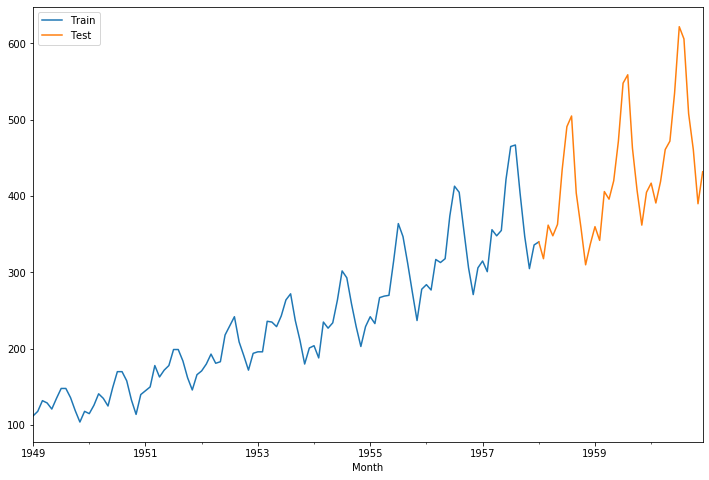

In [233]:
train_data['Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Passengers'].plot(legend=True, label= 'Test')

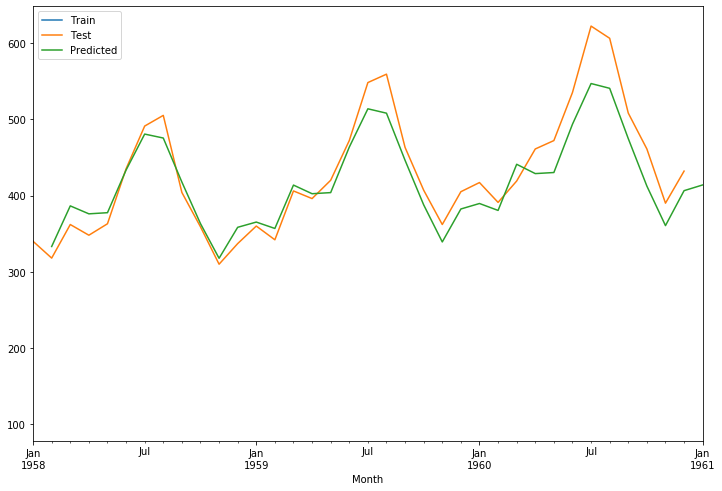

In [234]:
train_data['Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Passengers'].plot(legend=True, label= 'Test')
test_prediction.plot(legend=True, label='Predicted',xlim=['1958-01-01','1961-01-01']);

In [235]:
# We can observe that our result is bit over-predicting the count of passengers!

### Evaluating Predictions:

In [236]:
# Evaluations helps understand how off our predictions are from the actual data.
# To evaluate time series, we need metrics designed for continous values i.e Regression:
# - MAE
# - MSE
# - RMSE

In [237]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [238]:
mae = mean_absolute_error(test_data['Passengers'], test_prediction)

In [239]:
mae

44.53040895808394

In [240]:
mse = mean_squared_error(test_data['Passengers'], test_prediction)

In [241]:
mse

3069.8133268221086

In [242]:
import math
rmse = math.sqrt(mse)
rmse

55.405896137704595

In [245]:
# Once, we are satisfied with our test results, next step would be to train the model on entire data and predict forecasts:

fitted_model_final = ExponentialSmoothing(df['Passengers'], 
                                    trend='add', 
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [249]:
final_prediction = fitted_model_final.forecast(36)

In [250]:
final_prediction

1961-01-01    445.242356
1961-02-01    418.225292
1961-03-01    465.309524
1961-04-01    494.951238
1961-05-01    505.475795
1961-06-01    573.312460
1961-07-01    663.596208
1961-08-01    654.903822
1961-09-01    546.760930
1961-10-01    488.446921
1961-11-01    415.723565
1961-12-01    460.377945
1962-01-01    474.071141
1962-02-01    445.159432
1962-03-01    495.115974
1962-04-01    526.488107
1962-05-01    537.513148
1962-06-01    609.458428
1962-07-01    705.215682
1962-08-01    695.764567
1962-09-01    580.697976
1962-10-01    518.608451
1962-11-01    441.263016
1962-12-01    488.516626
1963-01-01    502.899925
1963-02-01    472.093573
1963-03-01    524.922424
1963-04-01    558.024977
1963-05-01    569.550502
1963-06-01    645.604396
1963-07-01    746.835155
1963-08-01    736.625312
1963-09-01    614.635022
1963-10-01    548.769981
1963-11-01    466.802467
1963-12-01    516.655308
Freq: MS, dtype: float64

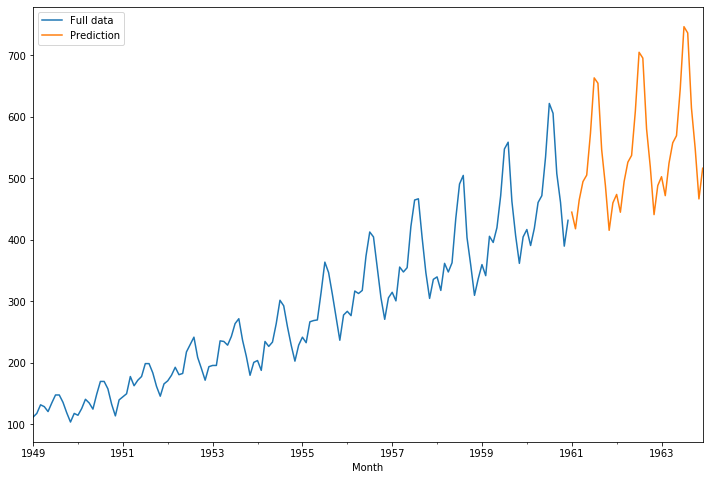

In [252]:
df['Passengers'].plot(legend=True, label='Full data', figsize=(12,8))
final_prediction.plot(legend=True, label='Prediction')

In [253]:
# Later on, we will learn more complex model that can predict better forecasts.